<a href="https://colab.research.google.com/github/gantaphani/Phanesh_INFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [1]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import math

In [2]:
#reading csv file to dataframe from github 
df=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/portfolio_data.csv',sep=',')
#changing datatype to datetime for Date column
df['Date']=pd.to_datetime(df['Date'])
print(df.head(5).to_string(index=False))

      Date       AMZN       DPZ        BTC      NFLX
2013-05-01 248.229996 51.190983 106.250000 30.415714
2013-05-02 252.550003 51.987320  98.099998 30.641428
2013-05-03 258.049988 52.446388 112.900002 30.492857
2013-05-06 255.720001 53.205257 109.599998 30.098572
2013-05-07 257.730011 54.151505 113.199997 29.464285


In [3]:
#Size of the dataframe
print('Size of the data frame',df.shape)

Size of the data frame (1520, 5)


In [4]:
#checking for null and duplicate values
print(df.isnull().sum())
print('There are no null values in the dataset\n')
print(df[df.duplicated()])
print('There are no duplicate values in the dataset\n')

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64
There are no null values in the dataset

Empty DataFrame
Columns: [Date, AMZN, DPZ, BTC, NFLX]
Index: []
There are no duplicate values in the dataset



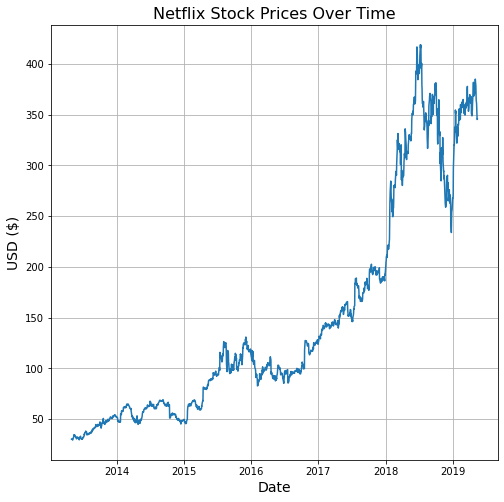

In [5]:
#visualizing netflix stock price over time
plt.figure(figsize=(8,8))
plt.title('Netflix Stock Prices Over Time',fontsize=16)
plt.plot(df.Date,df.NFLX)
plt.xlabel('Date',fontsize=14)
plt.ylabel('USD ($)',fontsize=14)
plt.grid()
plt.show()

In [6]:
#Changing the datatype of column Date
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(datetime.toordinal)

In [7]:
#Taking all shares as features for higher accuracy, except the target ones to predict shares of Netflix
Features=df[['Date','AMZN','DPZ','BTC']]
Targets=df['NFLX']

In [8]:
#Splitting the dataset into training and test sets
TrainFeatures,TestFeatures,TrainTargets,TestTargets=train_test_split(Features,Targets,test_size = 0.25, random_state = 42)
print("Training Features Shape",TrainFeatures.shape)
print("Training Targets Shape",TrainTargets.shape)
print("Testing Features Shape",TestFeatures.shape)
print("Testing Targets Shape",TestTargets.shape)

Training Features Shape (1140, 4)
Training Targets Shape (1140,)
Testing Features Shape (380, 4)
Testing Targets Shape (380,)


In [9]:
#Building and Training the Linear Regression Model
lr=LinearRegression()
lr.fit(TrainFeatures,TrainTargets)
#Predicting the Netflix shares Set and calcualting root mean squared error
linearPredictedValues=lr.predict(TestFeatures)
linearPredictedValues

array([ 59.36917186, 355.80873899, 304.66625304, 103.3106885 ,
        51.92236939,  40.67141083, 142.3130202 , 342.24950277,
        44.13044564,  41.90702287,  50.71362452, 110.00677071,
        54.28975358, 319.38329843, 285.41260069,  45.01972522,
       124.86766773, 310.99225968, 109.80340006, 288.15855893,
        60.25783878,  49.29347309,  89.12502565, 311.84420698,
       246.19326044, 180.83374963,  87.72850807, 171.16749788,
        54.06481985, 133.03112653,  45.58233955, 398.03670422,
       314.67367338, 172.81335893,  85.95548396, 332.71919549,
        66.38649388,  53.97840655, 376.35502143, 179.44640026,
       146.85047826,  77.08862406, 185.18913682, 180.63111214,
       284.56905799, 362.8826413 , 175.56704886, 336.62242218,
       129.61971359,  50.58928342,  70.13276899,  55.18146936,
       116.69222671,  51.58489092,  94.00091311,  42.78501593,
       149.53692905, 192.75937491, 337.91498809, 184.40790035,
        49.39532059,  60.40844578,  47.99480322,  99.22

In [10]:
#Root Mean Squared Error for Linear Regression Model
RMSE=math.sqrt(np.square(np.subtract(linearPredictedValues,TestTargets)).mean())
print("RMSE Error",RMSE)
print("Model Score",lr.score(TrainFeatures,TrainTargets))

RMSE Error 21.511283185287564
Model Score 0.9628535272235781


#### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [28]:
#importing required modules
import pandas as pd
import regex as re
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
nltk.download('words')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#reading csv files from github
trainDataset=pd.read_csv('https://raw.githubusercontent.com/gantaphani/Phanesh_INFO5502_Spring2022/main/train.csv',sep=',')
print(str('Training Dataset').center(150))
print(trainDataset.head(5).to_string(index=False))
print('\n')
testDataset=pd.read_csv('https://raw.githubusercontent.com/gantaphani/Phanesh_INFO5502_Spring2022/main/test.csv',sep=',')
print(str('Testing Dataset').center(150))
print(testDataset.head(5).to_string(index=False))

                                                                   Training Dataset                                                                   
 id  label                                                                                                                      tweet
  1      0                      @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
  2      0 @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  3      0                                                                                                        bihday your majesty
  4      0                                     #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
  5      0                                                                                     factsguide: society now    #motivation


                                           

In [30]:
#Checking For Null Values in both the datasets
print(trainDataset.any().isna())
print('Note there are no null values in the Traning Dataset\n')
print(testDataset.any().isna())
print('Note there are no null values in the Testing Dataset')

id       False
label    False
tweet    False
dtype: bool
Note there are no null values in the Traning Dataset

id       False
tweet    False
dtype: bool
Note there are no null values in the Testing Dataset


In [31]:
#Checking For Duplicate values in both the datasets
print(trainDataset[trainDataset.duplicated()])
print('Note there are no Duplicates in the Traning Dataset\n')
print(testDataset[testDataset.duplicated()])
print('Note there are no Duplicates in the Testing Dataset\n')

Empty DataFrame
Columns: [id, label, tweet]
Index: []
Note there are no Duplicates in the Traning Dataset

Empty DataFrame
Columns: [id, tweet]
Index: []
Note there are no Duplicates in the Testing Dataset



In [32]:
def removePunctuation(text:str):
  text=re.sub(r'[^\w\s]','',text)
  return text

In [33]:
def removeUnwantedSpaces(text:str):
  return re.sub(' +', ' ', text)

In [34]:
Englishwords=set(nltk.corpus.words.words())
def removeNonEnglishWords(text:str):
  return " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in Englishwords or not w.isalpha())

In [35]:
trainDataset['tweet']=trainDataset['tweet'].apply(lambda x:removePunctuation(x))
trainDataset['tweet']=trainDataset['tweet'].apply(lambda x:removeUnwantedSpaces(x))
trainDataset['tweet']=trainDataset['tweet'].apply(lambda x:removeNonEnglishWords(x))
print(str('Training Dataset After Cleaning The Tweets').center(100))
print(trainDataset.head(5).to_string(index=False))

                             Training Dataset After Cleaning The Tweets                             
 id  label                                                                   tweet
  1      0 user when a father is and is so selfish he his into his dysfunction run
  2      0         user user thanks for credit i cant use cause they dont offer in
  3      0                                                            your majesty
  4      0                              model i love u take with u all the time in
  5      0                                                  society now motivation


In [36]:
testDataset['tweet']=testDataset['tweet'].apply(lambda x:removePunctuation(x))
testDataset['tweet']=testDataset['tweet'].apply(lambda x:removeUnwantedSpaces(x))
testDataset['tweet']=testDataset['tweet'].apply(lambda x:removeNonEnglishWords(x))
print(str('Testing Dataset After Cleaning The Tweets').center(100))
print(testDataset.head(5).to_string(index=False))

                             Testing Dataset After Cleaning The Tweets                              
   id                                                                            tweet
31963                                                       passion dedication to find
31964                            user white want everyone to see the new movie and why
31965                                      safe ways to heal your acne healthy healing
31966 is the and the cursed child book up for already if yes where if no when favorite
31967                                 3rd to my amazing hilarious nephew uncle you and


In [37]:
#vectorizing the tweets
vector=CountVectorizer()
vector.fit(trainDataset['tweet'].append(testDataset['tweet'], ignore_index=True))

trainVector=vector.transform(trainDataset['tweet'])
testVector=vector.transform(testDataset['tweet'])

In [38]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    trainVector, trainDataset['label'].values, test_size=0.08, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29405, 15278)
(29405,)
(2557, 15278)
(2557,)


In [39]:
#Building and fitting the Logistic Regression Model
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [40]:
#predicting the label
pred_values=lr.predict(x_test)
print(pred_values)

[0 0 0 ... 0 0 0]


In [41]:
#Calculating accuracy of the model
print('Accuracy of the model:',accuracy_score(y_test,pred_values))

Accuracy of the model: 0.9534610872115761


In [42]:
#Calculating precision score of the model
print('precision score of the model:',precision_score(y_test,pred_values))

precision score of the model: 0.7407407407407407


In [43]:
#Calculating recall score of the model
print('recall score of the model:',recall_score(y_test,pred_values))

recall score of the model: 0.379746835443038


In [44]:
#Calculating f1 score of the model
print('f1-score of the model:',f1_score(y_test,pred_values))

f1-score of the model: 0.502092050209205


In [45]:
#predicting label for actual Testing Dataset
testDataset['label']=lr.predict(testVector)
print(testDataset.head(5).to_string(index=False))

   id                                                                            tweet  label
31963                                                       passion dedication to find      0
31964                            user white want everyone to see the new movie and why      0
31965                                      safe ways to heal your acne healthy healing      0
31966 is the and the cursed child book up for already if yes where if no when favorite      0
31967                                 3rd to my amazing hilarious nephew uncle you and      0
